In [31]:
import sys
sys.path.append("/home/donaf-strange/LAB_WORK/eeg_arithmetic_project/src")


In [32]:
from preprocessing import load_and_preprocess_edf
raw = load_and_preprocess_edf("/home/donaf-strange/LAB_WORK/eeg_arithmetic_project/data/files/Subject00_1.edf")

Extracting EDF parameters from /home/donaf-strange/LAB_WORK/eeg_arithmetic_project/data/files/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


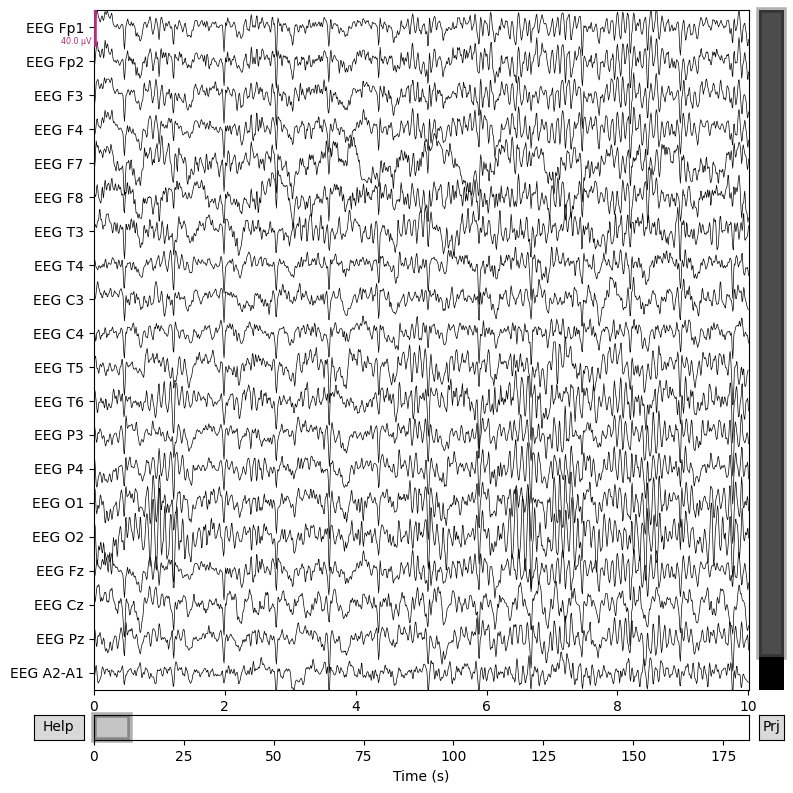

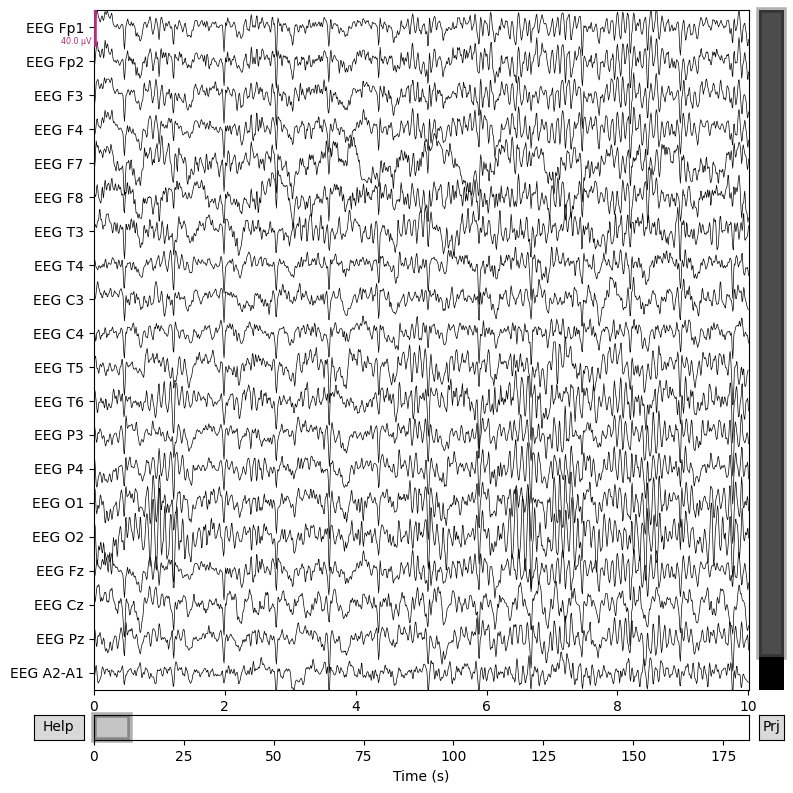

In [33]:
raw.plot()

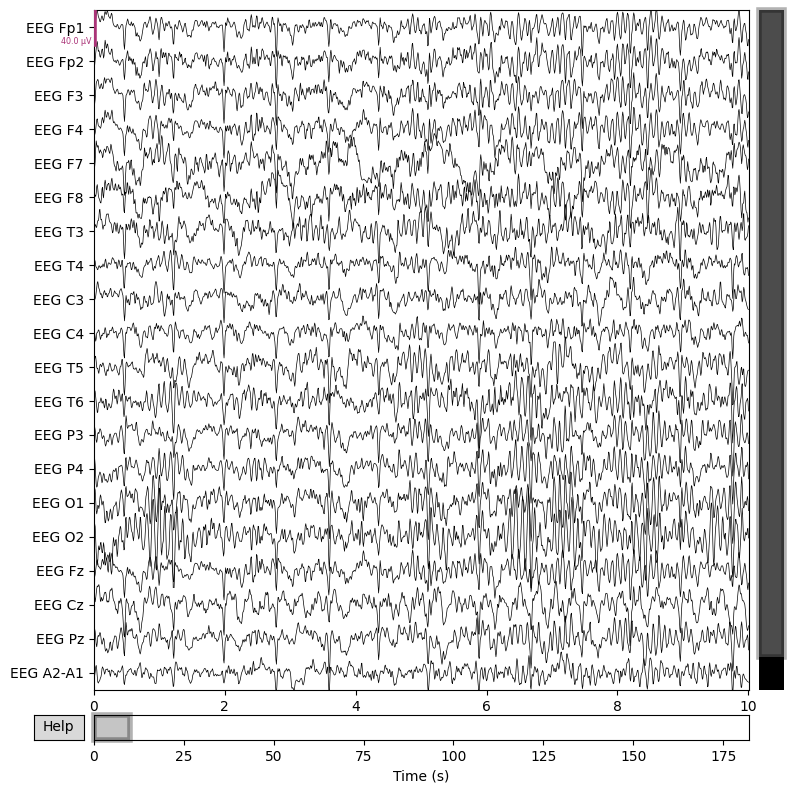

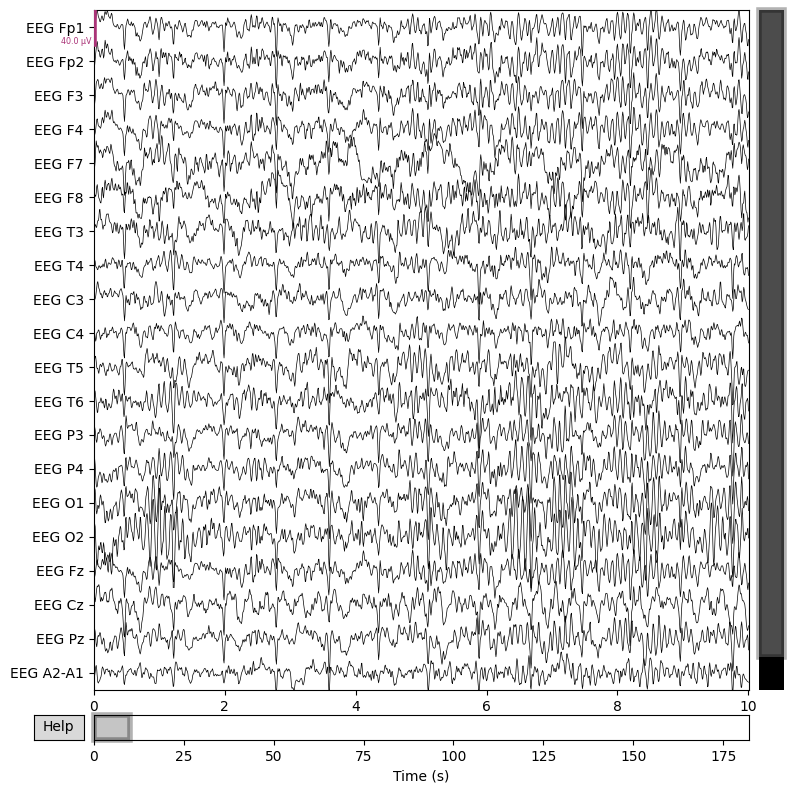

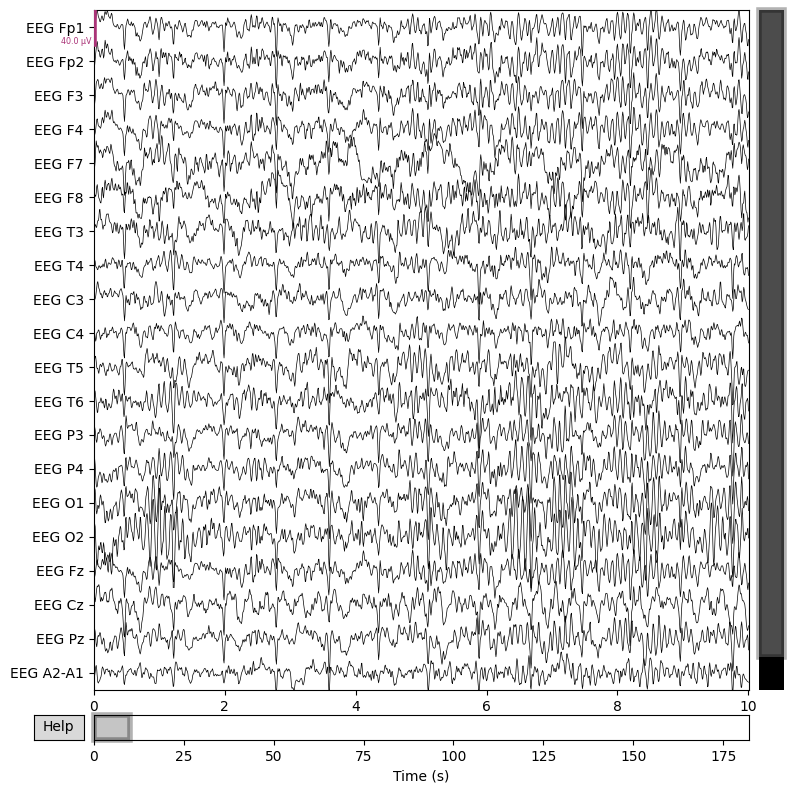

In [39]:
raw.plot(proj=False)
raw.plot()

Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Not setting metadata
361 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 361 events and 1000 original time points ...
0 bad epochs dropped


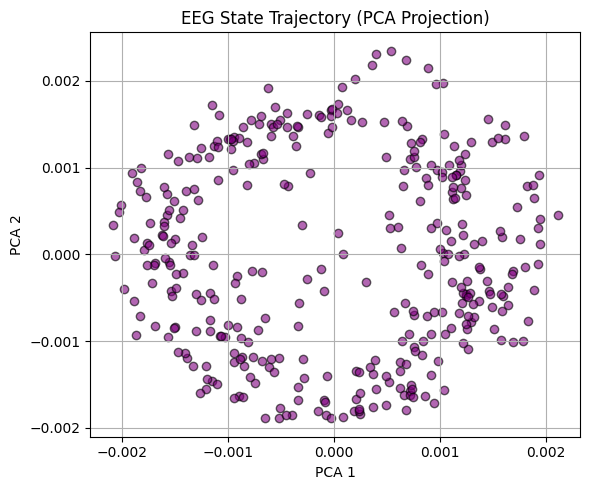

In [35]:
from preprocessing import load_and_preprocess_edf
from features import extract_state_space

# Apply average reference
raw.apply_proj()

# Extract state space (2D PCA)
states = extract_state_space(raw, window_size=2.0, step_size=0.5, n_components=2)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(states[:, 0], states[:, 1], alpha=0.6, c='purple', edgecolor='k')
plt.title("EEG State Trajectory (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

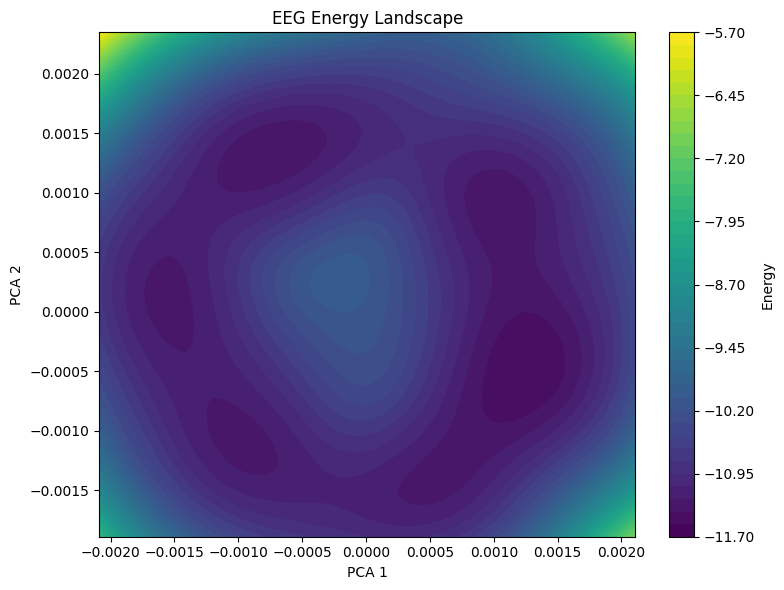

In [36]:
from landscape import compute_energy_landscape
X, Y, energy = compute_energy_landscape(states)

# Step 2: Plot energy surface
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, energy, levels=50, cmap="viridis")
plt.colorbar(contour, label="Energy")
plt.title("EEG Energy Landscape")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

In [37]:
from landscape import energy_entropy
H = energy_entropy(energy)
print(f"Energy entropy: {H:.4f}")

Energy entropy: 9.0724


In [38]:
from landscape import compute_energy_landscape, count_energy_wells

X, Y, energy = compute_energy_landscape(states)
n_wells, wells_mask = count_energy_wells(energy)

print("Number of attractor wells:", n_wells)

Number of attractor wells: 5


In [41]:
#something happeneing